<a href="https://colab.research.google.com/github/meghasingh26/advance-analytics/blob/main/bank_%2B_marketing_advance_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


Joining the data after importing

In [ ]:
#excel files
b = "/content/drive/MyDrive/Colab Notebooks/advance comp/bank excel.xlsx"
ba = "/content/drive/MyDrive/Colab Notebooks/advance comp/bank-additional excel.xlsx"
baf = "/content/drive/MyDrive/Colab Notebooks/advance comp/bank-additional-full excel.xlsx"
bf = "/content/drive/MyDrive/Colab Notebooks/advance comp/bank-full excel.xlsx"
# Load each file into a dataframe
df_b = pd.read_excel(b)
df_ba = pd.read_excel(ba)
df_baf = pd.read_excel(baf)
df_bf = pd.read_excel(bf)

# Combine all dataframes
final_b = pd.concat([df_b, df_bf, df_ba, df_baf], ignore_index=True)

# Check result
final_b.shape
final_b.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,day_of_week,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19.0,...,-1,0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11.0,...,339,4,failure,no,NaN,NaN,NaN,NaN,NaN,NaN
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16.0,...,330,1,failure,no,NaN,NaN,NaN,NaN,NaN,NaN
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3.0,...,-1,0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5.0,...,-1,0,unknown,no,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Remove duplicates if any
final_b = final_b.drop_duplicates()

final_b.shape

final_b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86387 entries, 0 to 95038
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             86387 non-null  int64  
 1   job             86387 non-null  object 
 2   marital         86387 non-null  object 
 3   education       86387 non-null  object 
 4   default         86387 non-null  object 
 5   balance         45211 non-null  float64
 6   housing         86387 non-null  object 
 7   loan            86387 non-null  object 
 8   contact         86387 non-null  object 
 9   day             45211 non-null  float64
 10  month           86387 non-null  object 
 11  duration        86387 non-null  int64  
 12  campaign        86387 non-null  int64  
 13  pdays           86387 non-null  int64  
 14  previous        86387 non-null  int64  
 15  poutcome        86387 non-null  object 
 16  y               86387 non-null  object 
 17  day_of_week     41176 non-null  obje

In [ ]:
columns_to_keep = [
    "age", "job", "marital", "education", "default", "balance",
    "housing", "loan", "contact", "day_of_week", "month",
    "duration", "campaign", "pdays", "previous", "poutcome", "y"
]

# Create a new DataFrame with only these columns
to_keep_df = final_b[columns_to_keep]

# check remaining columns
print(to_keep_df.columns)
to_keep_df.shape
to_keep_df.info()

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 86387 entries, 0 to 95038
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          86387 non-null  int64  
 1   job          86387 non-null  object 
 2   marital      86387 non-null  object 
 3   education    86387 non-null  object 
 4   default      86387 non-null  object 
 5   balance      45211 non-null  float64
 6   housing      86387 non-null  object 
 7   loan         86387 non-null  object 
 8   contact      86387 non-null  object 
 9   day_of_week  41176 non-null  object 
 10  month        86387 non-null  object 
 11  duration     86387 non-null  int64  
 12  campaign     86387 non-null  int64  
 13  pdays        86387 non-null  int64  
 14 

## **Final data after concatinating the data df_remove**

In [ ]:
# Remove duplicates and store in a new DataFrame
df_clean = to_keep_df.drop_duplicates()

In [ ]:
#to_keep_df.duplicated().sum()
df_clean.duplicated().sum()

np.int64(0)

In [ ]:
print(df_clean)

       age          job  marital            education default  balance  \
0       30   unemployed  married              primary      no   1787.0   
1       33     services  married            secondary      no   4789.0   
2       35   management   single             tertiary      no   1350.0   
3       30   management  married             tertiary      no   1476.0   
4       59  blue-collar  married            secondary      no      0.0   
...    ...          ...      ...                  ...     ...      ...   
95033   29   unemployed   single             basic.4y      no      NaN   
95034   73      retired  married  professional.course      no      NaN   
95036   56      retired  married    university.degree      no      NaN   
95037   44   technician  married  professional.course      no      NaN   
95038   74      retired  married  professional.course      no      NaN   

      housing loan   contact day_of_week month  duration  campaign  pdays  \
0          no   no  cellular      

In [ ]:
df_clean.shape
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86386 entries, 0 to 95038
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          86386 non-null  int64  
 1   job          86386 non-null  object 
 2   marital      86386 non-null  object 
 3   education    86386 non-null  object 
 4   default      86386 non-null  object 
 5   balance      45211 non-null  float64
 6   housing      86386 non-null  object 
 7   loan         86386 non-null  object 
 8   contact      86386 non-null  object 
 9   day_of_week  41175 non-null  object 
 10  month        86386 non-null  object 
 11  duration     86386 non-null  int64  
 12  campaign     86386 non-null  int64  
 13  pdays        86386 non-null  int64  
 14  previous     86386 non-null  int64  
 15  poutcome     86386 non-null  object 
 16  y            86386 non-null  object 
dtypes: float64(1), int64(5), object(11)
memory usage: 11.9+ MB


Checking null values in data

In [ ]:
# Returns True if there is at least one missing value
print(df_clean.isnull().values.any())
# Number of missing values in each column
print(df_clean.isnull().sum())

True
age                0
job                0
marital            0
education          0
default            0
balance        41175
housing            0
loan               0
contact            0
day_of_week    45211
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
y                  0
dtype: int64


Filling the data nan cells using median and mode

In [ ]:
# Fill balance with median (robust to outliers)
df_clean['balance'] = df_clean['balance'].fillna(df_clean['balance'].median())
df_clean['day_of_week'] = df_clean['day_of_week'].fillna(df_clean['day_of_week'].mode()[0])
# Number of missing values in each column
print(df_clean.isnull().sum())

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64


/tmp/ipython-input-3591814912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['balance'] = df_clean['balance'].fillna(df_clean['balance'].median())
/tmp/ipython-input-3591814912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['day_of_week'] = df_clean['day_of_week'].fillna(df_clean['day_of_week'].mode()[0])


# **Perfoming EDA on Data**

In [ ]:
df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,thu,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,thu,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,thu,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,thu,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,thu,may,226,1,-1,0,unknown,no


In [ ]:
# Sort df_clean by 'age' in ascending order
df_clean = df_clean.sort_values(by='age', ascending=True)

# Display the first few rows to verify the sorting
display(df_clean.head())

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
91430,17,student,single,basic.9y,no,448.0,unknown,unknown,cellular,fri,aug,498,2,999,1,failure,yes
92125,17,student,single,unknown,no,448.0,no,yes,cellular,tue,oct,896,1,2,2,success,yes
91409,17,student,single,basic.9y,no,448.0,yes,no,cellular,fri,aug,92,3,4,2,success,no
91390,17,student,single,basic.9y,no,448.0,yes,no,cellular,fri,aug,182,2,999,2,failure,no
90991,17,student,single,unknown,no,448.0,yes,no,cellular,wed,aug,432,3,4,2,success,no


### 1. Univariate Distributions: Numerical Features (Histograms)

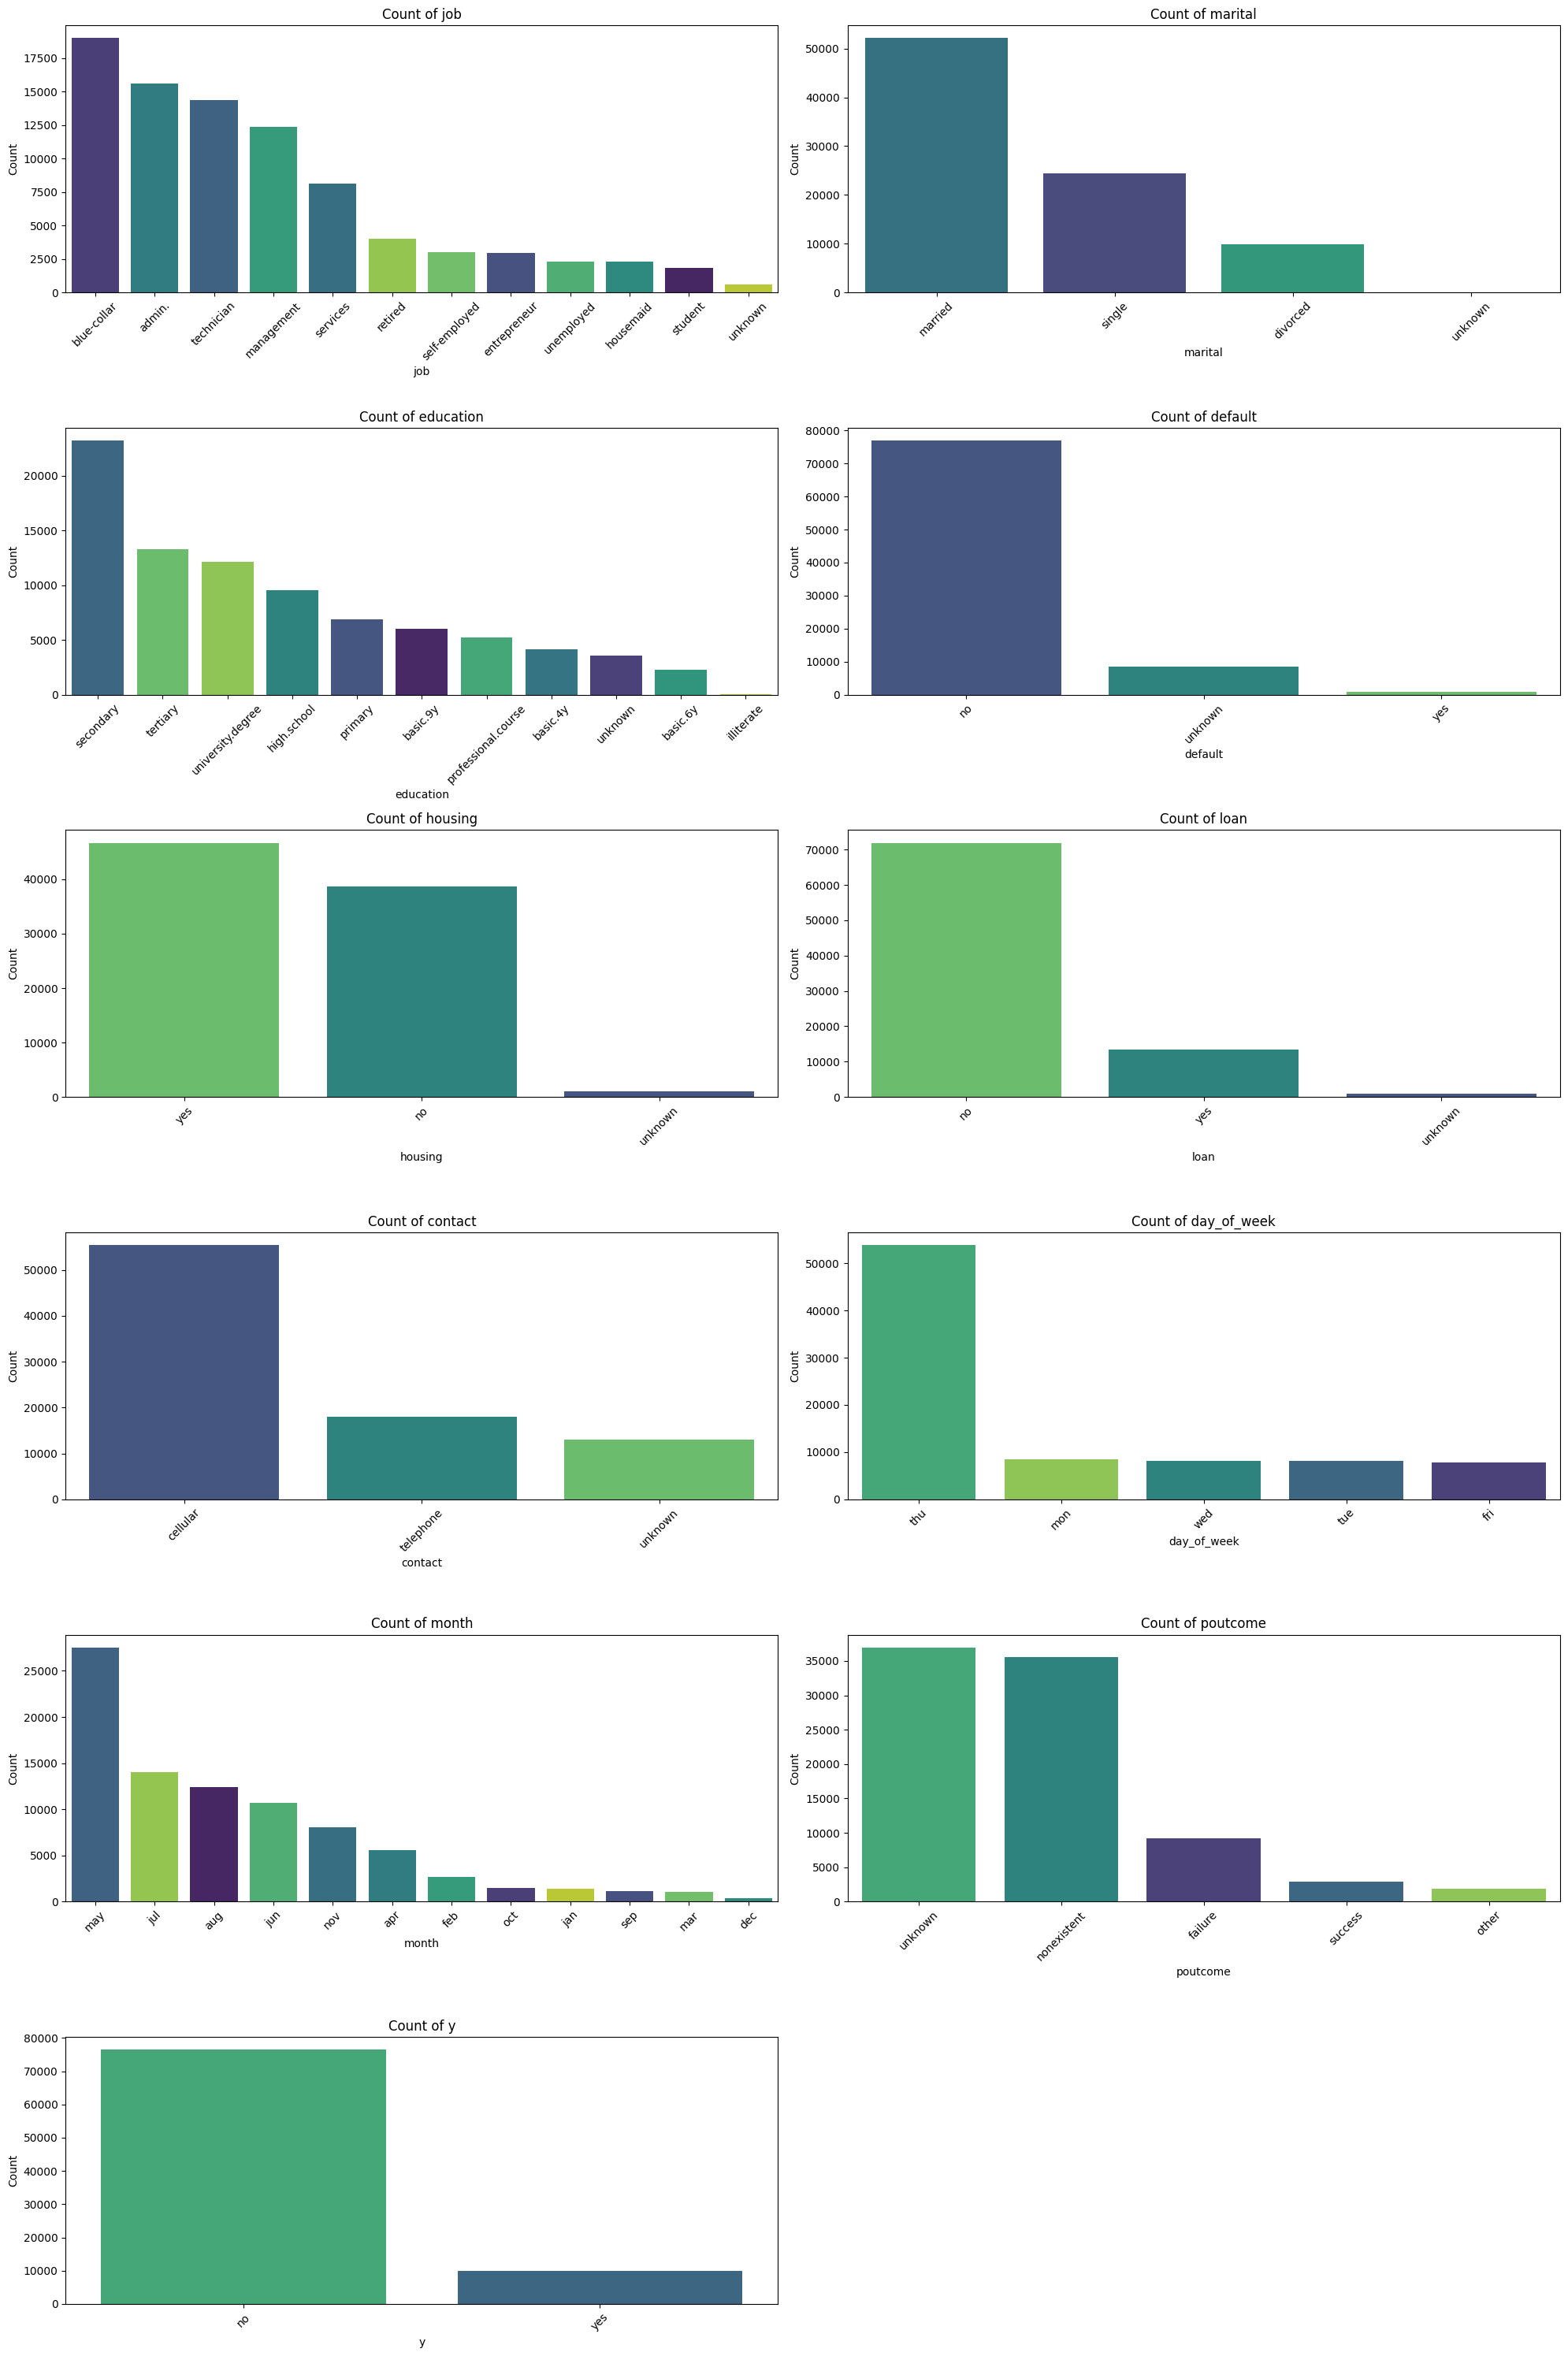

In [ ]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'month', 'poutcome', 'y']

num_plots = len(categorical_cols)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df_clean, x=col, ax=axes[i], palette='viridis', order=df_clean[col].value_counts().index, hue=col, legend=False)
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
# remove the sub plot in figure as the data is in even so it will generate extra fig
for j in range(i + 1, len(axes)):
     fig.delaxes(axes[j])

plt.tight_layout()# to fix the layout can overlapp
plt.show()

##Job:
###higher 3 jobs are blue-collar,admin.,technitian
The plot shows which job types are most common in the dataset. Some professions clearly dominate, while others appear much less frequently. This helps identify whether certain job groups are over- or under-represented.

##Marital status:
###more loans are given to married people
This plot highlights the proportion of married, single, and divorced customers. One group tends to be more frequent, giving insight into the typical customer profile.

##Education:
The education plot shows how customers are distributed across different education levels. It reveals whether the dataset is skewed toward a particular level of education and whether there are many unknown values.

##Default:
Most customers fall into the “no default” category, with very few having defaulted. This indicates a strong class imbalance, which is important to consider during analysis and modeling.

##Housing loan:
###more housing loan are taken
This plot shows how many customers have housing loans versus those who do not. It provides an idea of customers’ long-term financial commitments.

##Personal loan:
###less personal loans are taken
The majority of customers do not have personal loans, while a smaller portion does. This suggests personal loans are less common compared to housing loans.

##Contact type:
###more loans are provided with cellular
The contact plot shows that one communication method (such as cellular) is used far more often than others, indicating the preferred way customers are contacted.

##Day of the week:
###more lones are taken on thrusday
The distribution across weekdays shows which days customers are most frequently contacted. Some days have noticeably higher activity than others.

##Month:
###more loans are provided in may
This plot reveals clear seasonal patterns, with certain months having significantly more interactions. This can be useful for planning future campaigns.

##Previous campaign outcome:
Most entries fall under “unknown” or “failure,” while successful outcomes are relatively rare. This suggests past campaigns had limited success or incomplete outcome tracking.

##Target variable (y):
###many people have not subscribed
The final plot shows a strong imbalance between “yes” and “no.” Most customers did not respond positively, which is a key consideration for predictive modeling

## 2. Bivariate Relationships: Age vs Categorical Features

(violin plot) as it show the frequency distibution

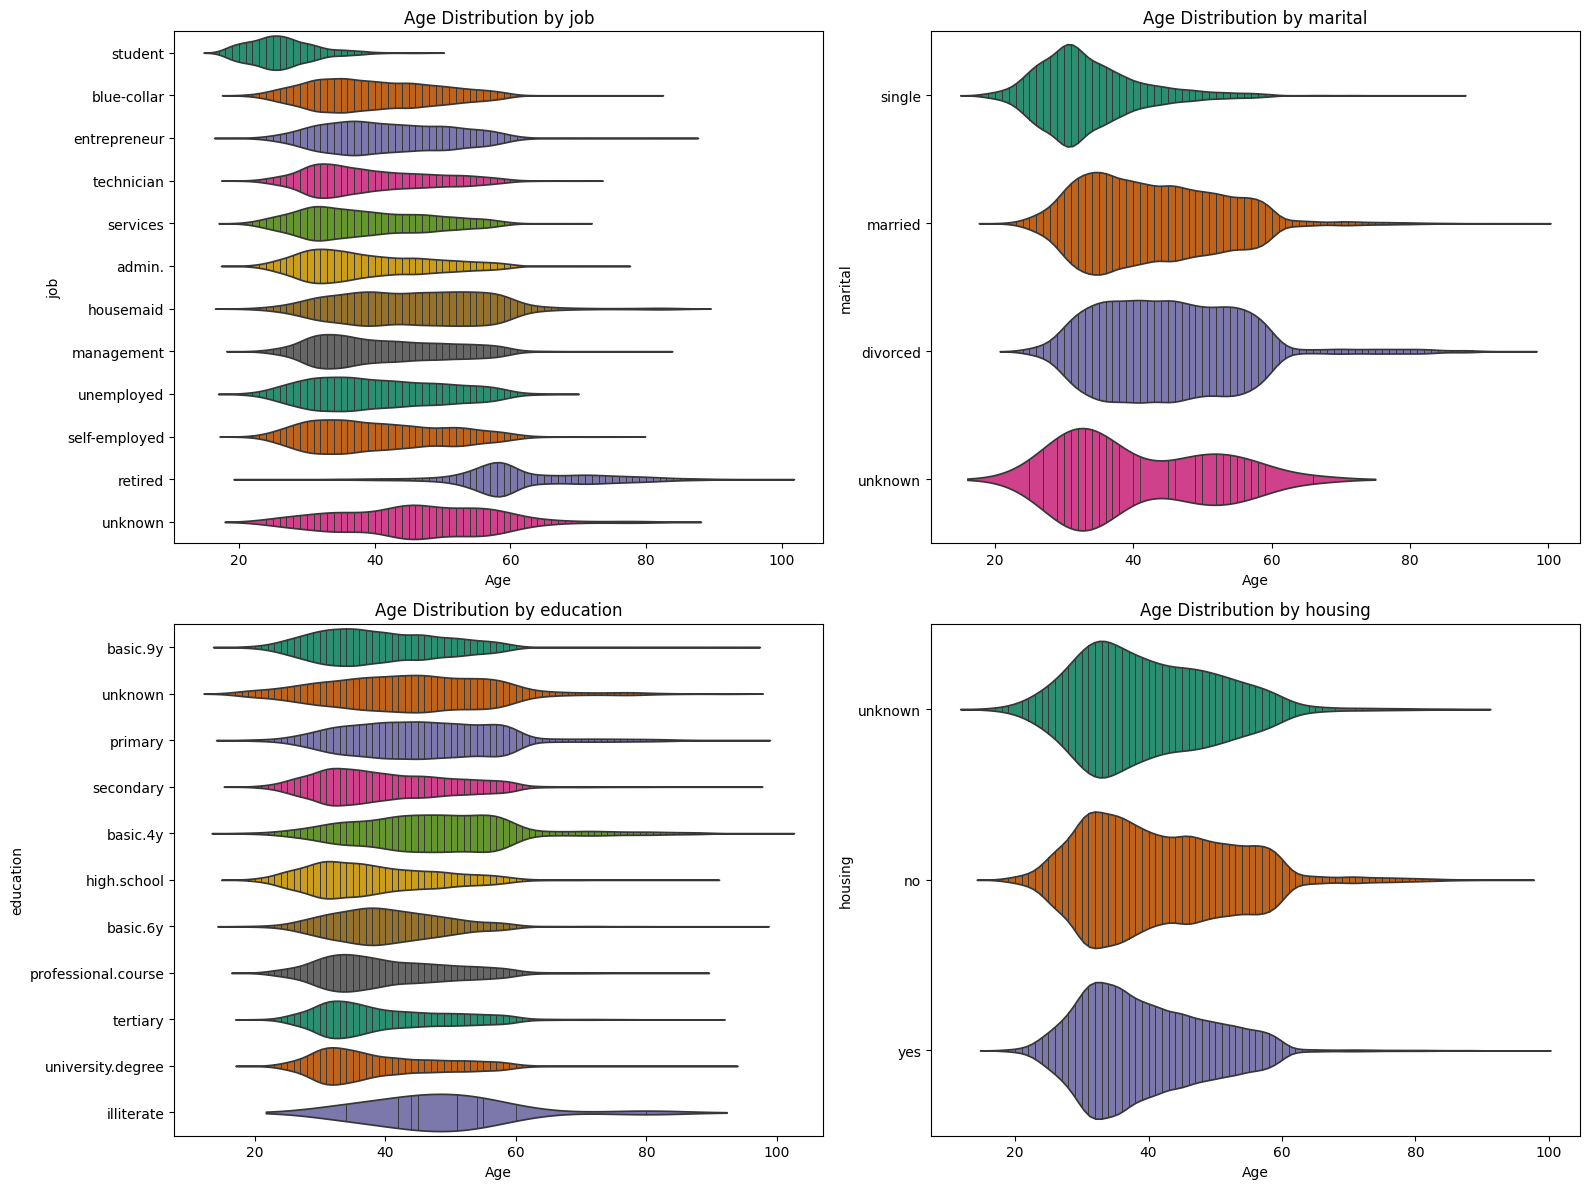

In [ ]:
categorical_features_for_age = ['job', 'marital', 'education', 'housing']

num_plots = len(categorical_features_for_age)
num_cols = 2 # Two plots per row
num_rows = (num_plots ) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 6 * num_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_features_for_age):
    sns.violinplot(data=df_clean, x='age', y=col, inner='stick', palette='Dark2', ax=axes[i], hue=col, legend=False)
    axes[i].set_title(f'Age Distribution by {col}')
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel(col)
# remove the sub plot in figure as the data is in even so it will generate extra fig
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#Age Distribution by Job


Younger customers tend to appear more in student, admin, and service-related jobs, with age distributions concentrated in the lower age range.

Management and technician roles usually show a wider age spread, suggesting people stay longer or enter these roles at different stages of life.

Retired customers are clearly skewed toward higher ages, forming a distinct group.

The thickness of the violins indicates that some jobs (like admin or blue-collar) have a higher concentration of customers compared to others.

### Outcome: Age is strongly influenced by job type, and certain professions clearly correspond to specific life stages.

## Age Distribution by Marital Status

This plot highlights how age changes across marital groups.

Single individuals are mostly concentrated in younger age ranges.

Married customers span a much broader age range, indicating this status is common across adulthood.

Divorced individuals tend to cluster in the middle to higher age ranges, with fewer younger customers.

### Outcome: Marital status shows a clear relationship with age, reflecting typical life progression patterns.

##Age Distribution by Education Level

This plot shows how education levels relate to age distribution.

Customers with primary or secondary education often cover a wider age range, including older individuals.

Tertiary-educated customers tend to be slightly younger on average, possibly reflecting more recent access to higher education.

The spread suggests that higher education is more common among working-age adults rather than retirees.

### Outcome: Education level has a noticeable but less extreme impact on age compared to job or marital status.

##Age Distribution by Housing (Loan Status)

This plot compares age distribution based on housing ownership or loans.

Customers with housing loans are generally concentrated in middle-age groups, reflecting home ownership during working years.

Those without housing loans show a broader age range, including younger individuals and retirees.

This suggests housing loans are tied to a specific stage in financial life.

###Outcome: Housing status aligns closely with age and financial stability.

## 3. univerient distribution

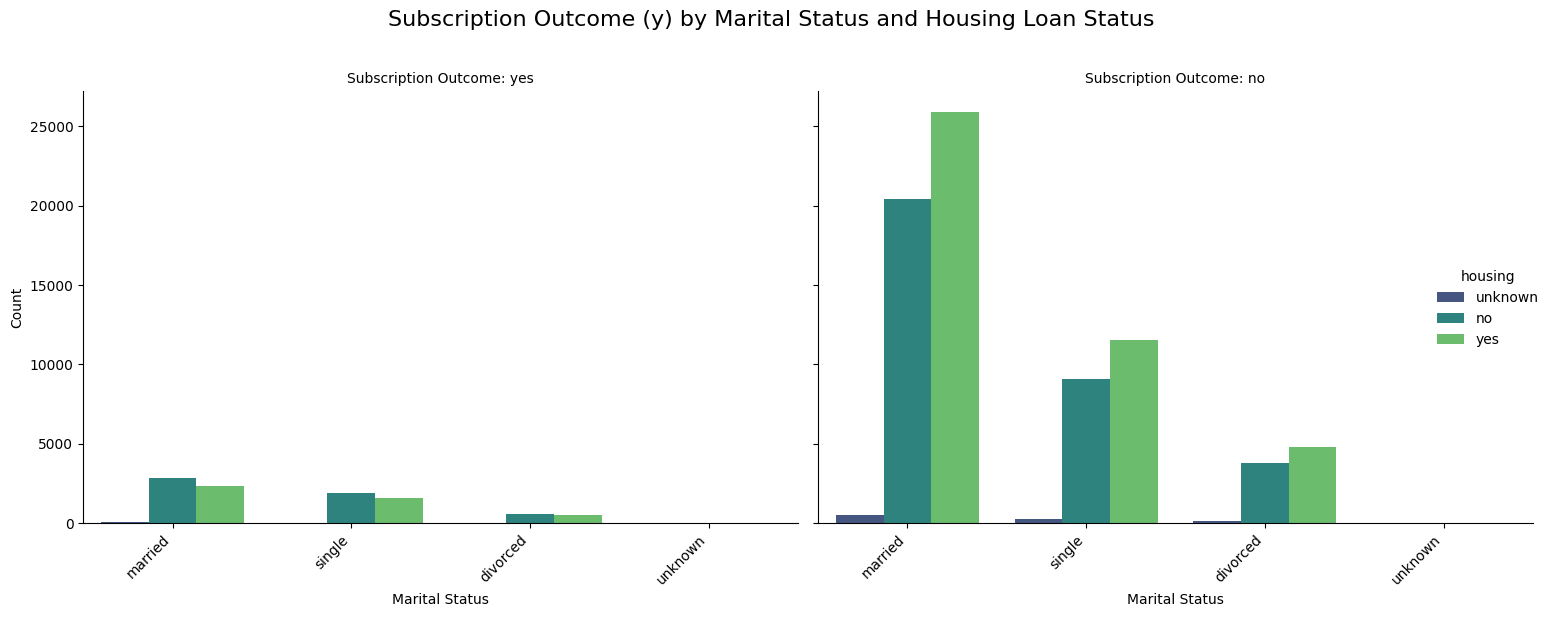

In [ ]:
# Sort marital categories by total count
marital_order = df_clean['marital'].value_counts().index

# Create catplot with sorted bars
g = sns.catplot(
    data=df_clean,
    x='marital',
    hue='housing',
    col='y',
    kind='count',
    palette='viridis',
    height=6,
    aspect=1.2,
    order=marital_order  # sorted order
)

# Axis labels, titles, and rotated x-axis labels
g.set_axis_labels('Marital Status', 'Count')
g.set_titles('Subscription Outcome: {col_name}')
g.set_xticklabels(rotation=45, ha='right')

# Overall figure title
plt.suptitle('Subscription Outcome (y) by Marital Status and Housing Loan Status', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

* Married customers form the largest group across both subscription outcomes (y
= yes and y = no), indicating they are the most represented marital status in the dataset.

* Across all marital categories, customers without a housing loan (housing = no) appear more frequently than those with a housing loan.

In the “no subscription” (y = no) group:

* Counts are significantly higher for all marital statuses, showing that most customers do not subscribe regardless of marital status.

* Married and single individuals dominate the non-subscription outcome.

In the “subscription” (y = yes) group:

* The overall number of subscribers is much smaller.

* Single and married customers without housing loans show comparatively higher subscription counts than those with housing loans.

* Customers with a housing loan are consistently less likely to subscribe, regardless of marital status.

##insight: Marital status influences customer distribution, but housing loan status has a stronger association with subscription outcomes—customers without housing loans are more likely to subscribe.

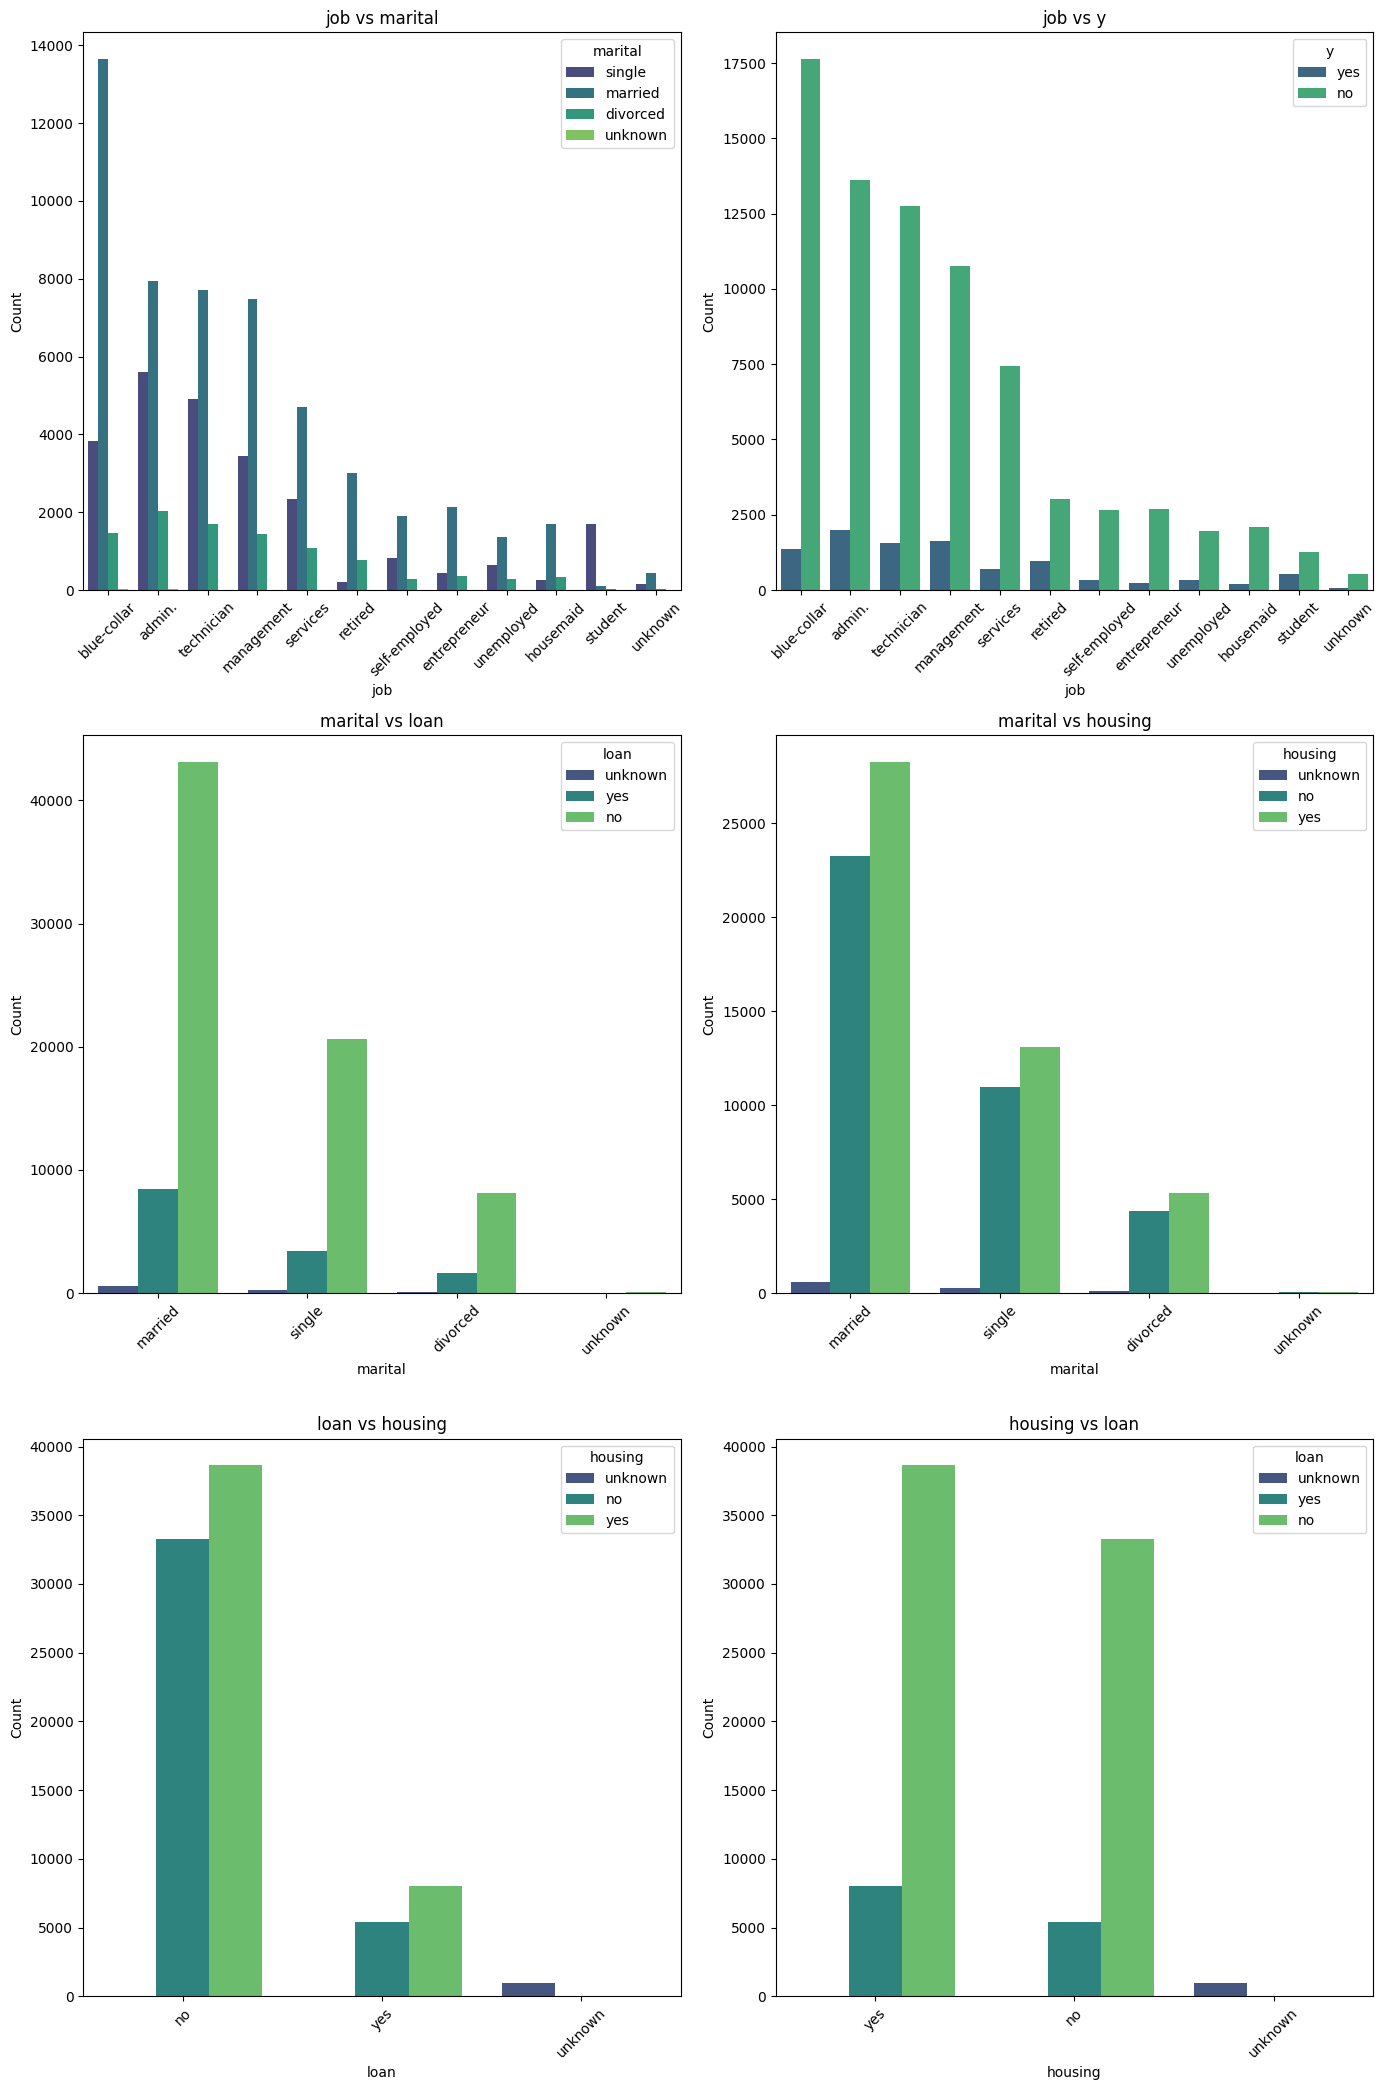

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_pairs = [
    ('job', 'marital'),
    ('job','y'),
    ('marital', 'loan'),
    ('marital', 'housing'),
    ('loan','housing'),
    ('housing', 'loan')
]

num_plots = len(categorical_pairs)
num_cols = 2  # plots per row
num_rows = (num_plots + 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(14, 7 * num_rows))
axes = axes.flatten()

for i, (col1, col2) in enumerate(categorical_pairs):
  # Sort categories of col1 by total count
    order = df_clean[col1].value_counts().index
    sns.countplot(data=df_clean, x=col1, hue=col2, ax=axes[i], palette='viridis', order=order)
    axes[i].set_title(f'{col1} vs {col2}')
    axes[i].set_xlabel(col1)
    axes[i].set_ylabel('Count')
    axes[i].legend(title=col2)
     # Tilt x-axis labels
    axes[i].tick_params(axis='x', rotation=45)

# Remove extra subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#  Job vs Marital Status

* Most married individuals are in stable jobs like admin, management, technician, and blue-collar.

* Single individuals dominate student, unemployed, or entry-level roles.

* Divorced customers tend to appear in mid-career jobs.

###Insight: Job type reflects life stage. Stable employment is closely associated with marriage, while students or unemployed are mostly single.

#Job vs Subscription Outcome (y)

* Jobs like management, technician, and admin have higher subscription counts (y = yes).

* Students and unemployed have much lower subscription rates.

###Insight: Occupation is strongly related to subscription likelihood. Stable jobs with higher income are more likely to subscribe.

#Marital Status vs Personal Loan

* Married customers are more likely to have personal loans.

* Single customers rarely take personal loans.

* Divorced customers fall somewhere in between.

###Insight: Loan uptake increases with financial responsibility, which often comes with marriage.

#Marital Status vs Housing Loan

* Married individuals dominate housing loans.

* Single individuals rarely have housing loans.

* Divorced customers have moderate participation.

###Insight: Housing loans are strongly tied to marital status and long-term financial planning.

#Housing Loan vs Personal Loan

* Customers with housing loans are more likely to also have personal loans.

* Those without housing loans mostly avoid personal loans.

###Insight: Loan products tend to cluster. Customers already managing one loan are more open to taking additional loans.

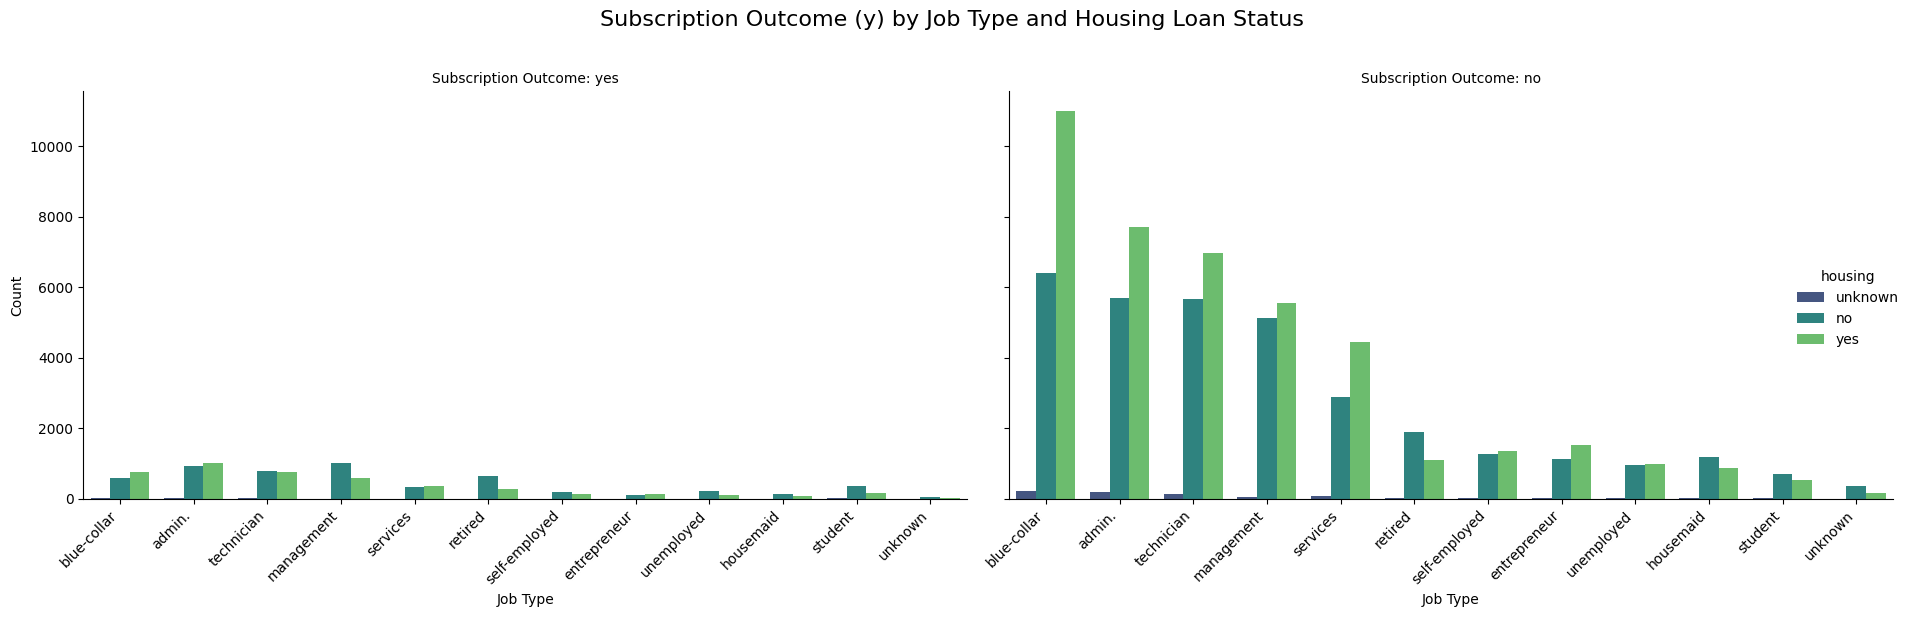

In [ ]:
# Sort job categories by total count
job_order = df_clean['job'].value_counts().index

# Create catplot with sorted bars
g = sns.catplot(
    data=df_clean,
    x='job',
    hue='housing',
    col='y',
    kind='count',
    palette='viridis',
    height=6,
    aspect=1.5,
    order=job_order  # sorted order
)

# Axis labels, titles, and rotated x-axis labels
g.set_axis_labels('Job Type', 'Count')
g.set_titles('Subscription Outcome: {col_name}')
g.set_xticklabels(rotation=45, ha='right')

# Overall figure title
plt.suptitle('Subscription Outcome (y) by Job Type and Housing Loan Status', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

### Conclusion for Relationship between 'job', 'housing' loan status, and 'y'

The faceted bar plots effectively illustrate how job type and housing loan status relate to the term deposit subscription outcome ('y').

For `y = no` (did not subscribe):
*   **Job Types:** Blue-collar, management, and technical jobs show a high number of 'no' subscriptions, likely due to their larger proportions in the dataset. Students and retired individuals generally have fewer 'no' subscriptions.
*   **Housing Loan:** Across almost all job types, individuals with a 'yes' housing loan (meaning they have a housing loan) consistently show a higher count of 'no' subscriptions compared to those with 'no' housing loan. This suggests that having a housing loan might correlate with a lower propensity to subscribe to a term deposit.

For `y = yes` (subscribed):
*   **Job Types:** Management, technician, and administrative jobs contribute a notable number of 'yes' subscriptions. Students and retired individuals, despite their smaller overall counts, also show a reasonable proportion of 'yes' subscriptions, suggesting they might be more receptive.
*   **Housing Loan:** Similar to the 'no' outcome, for most job types, individuals without a housing loan ('no' housing) tend to have slightly more 'yes' subscriptions than those with a housing loan ('yes' housing). This further reinforces the observation that having a housing loan might be a negative indicator for term deposit subscription.

**Overall Insight:** There's a clear dominance of 'no' subscriptions across all job types. The presence of a housing loan appears to be a consistent factor, generally associated with a higher likelihood of not subscribing and a lower likelihood of subscribing. Management and blue-collar workers form large segments in both subscription outcomes, reflecting their overall representation in the dataset.

## Summary:

### Data Analysis Key Findings
*   **Target Variable Imbalance:** The target variable 'y' (subscription) exhibits a significant class imbalance, with a substantially higher number of 'no' subscriptions compared to 'yes' subscriptions.
*   **Impact of Housing Loan:** Across all analyzed demographics ('job', 'marital status', 'age'), individuals with a housing loan consistently show a higher propensity not to subscribe and a lower propensity to subscribe to a term deposit.
*   **Job-Specific Trends:** Blue-collar, management, and technical jobs show a high number of 'no' subscriptions, while management, technician, and administrative jobs contribute notably to 'yes' subscriptions. Students and retired individuals, despite smaller overall numbers, show a reasonable proportion of 'yes' subscriptions.
*   **Marital Status Influence:** Married individuals account for the highest counts in both 'no' and 'yes' subscriptions. However, single and divorced individuals, though fewer in absolute numbers, show a relatively better subscription rate compared to married individuals for the 'yes' outcome.
*   **Age and Housing Loan for Subscribers:** While middle-aged individuals (30s-50s) are prominent among both subscribers and non-subscribers, there is a distinct pattern for 'yes' subscribers without a housing loan, who exhibit a bimodal age distribution with notable activity in younger adults (20s-30s) and older age groups (60+).




# **PREPARING DATA FOR MODELING**

In [ ]:
# Split the data into predictor and target variables.
new=df_clean
X = new.drop('y', axis=1)
y = new['y']
print(X.head())
print(y.head())

       age      job marital education default  balance  housing     loan  \
91430   17  student  single  basic.9y      no    448.0  unknown  unknown   
92125   17  student  single   unknown      no    448.0       no      yes   
91409   17  student  single  basic.9y      no    448.0      yes       no   
91390   17  student  single  basic.9y      no    448.0      yes       no   
90991   17  student  single   unknown      no    448.0      yes       no   

        contact day_of_week month  duration  campaign  pdays  previous  \
91430  cellular         fri   aug       498         2    999         1   
92125  cellular         tue   oct       896         1      2         2   
91409  cellular         fri   aug        92         3      4         2   
91390  cellular         fri   aug       182         2    999         2   
90991  cellular         wed   aug       432         3      4         2   

      poutcome  
91430  failure  
92125  success  
91409  success  
91390  failure  
90991  succes

In [ ]:
# One-Hot Encode for independent categorical variable and dropping the first column.
categorical_cols = X.select_dtypes(include='object').columns

X_encoded = pd.get_dummies(X,columns=categorical_cols,drop_first=True,   dtype=int )
X_encoded.head()


,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_other,poutcome_success,poutcome_unknown
91430,17,448.0,498,2,999,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92125,17,448.0,896,1,2,2,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
91409,17,448.0,92,3,4,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
91390,17,448.0,182,2,999,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90991,17,448.0,432,3,4,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


###encoding target variable

In [ ]:
y_encoded = y.replace({'no': 0, 'yes': 1})


/tmp/ipython-input-3907601357.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_encoded = y.replace({'no': 0, 'yes': 1})


###Split into Training and Test Sets

In [ ]:
np.random.seed(0)  # We specify this so that the train and test data set always have the same rows, respectively
X_train, X_test,y_train, y_test = train_test_split(X_encoded,y_encoded, train_size = 0.8, test_size = 0.2, random_state = 42, stratify=y_encoded)#stratify=y ensures target distribution is maintained.

# Checking the shape of training and testing dataset
X_train.shape, X_test.shape

((69108, 57), (17278, 57))

###Scale/Normalize Features

In [ ]:
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


###count of imbalance

In [ ]:
y.value_counts()
y_encoded.value_counts()


,count
y,
0,76458
1,9928


#model building

#Decision tree

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', max_features = 'sqrt', random_state=42, max_depth=3)
dt_train = dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("=== Decision Tree ===")


=== Decision Tree ===


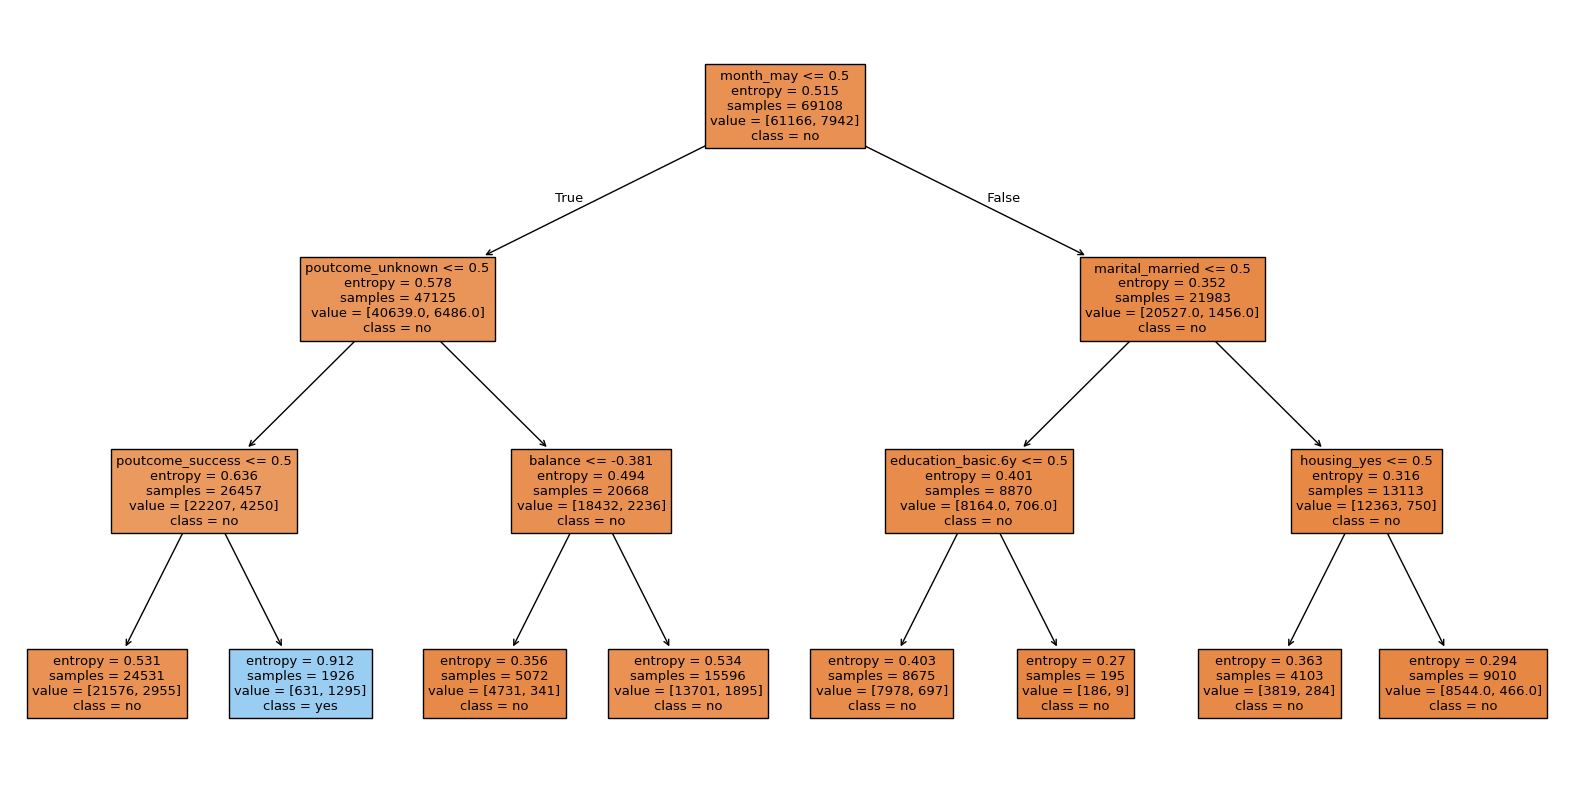

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(
    dt,
    feature_names=X_train.columns,  # x traind on encoded
    class_names=["no", "yes"],
    filled=True
)
plt.show()


###classification accuracy and matrix after ploting model

In [ ]:


# Predict on test data
y_test_pred = dt.predict(X_test)

# If y_encoded is 0/1, no need to decode
# If you want labels "no"/"yes":
y_test_pred_labels = ['yes' if x==1 else 'no' for x in y_test_pred]
y_test_labels = ['yes' if x==1 else 'no' for x in y_test]

# Print metrics
print("Test Accuracy:", accuracy_score(y_test_labels, y_test_pred_labels))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_labels, y_test_pred_labels))
print("\nClassification Report:\n", classification_report(y_test_labels, y_test_pred_labels))


Test Accuracy: 0.8964000463016553


TypeError: got an unexpected keyword argument 'normalization'

#Randome forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("=== Random Forest ===")


=== Random Forest ===


### ploating features for random forest trees
gives the importance of each feature in predicting the target variable.

Each value represents how much a feature contributed to reducing impurity (entropy or Gini) across all trees in the forest.

Sorting and plotting these values as a bar chart helps you see at a glance which features matter most.

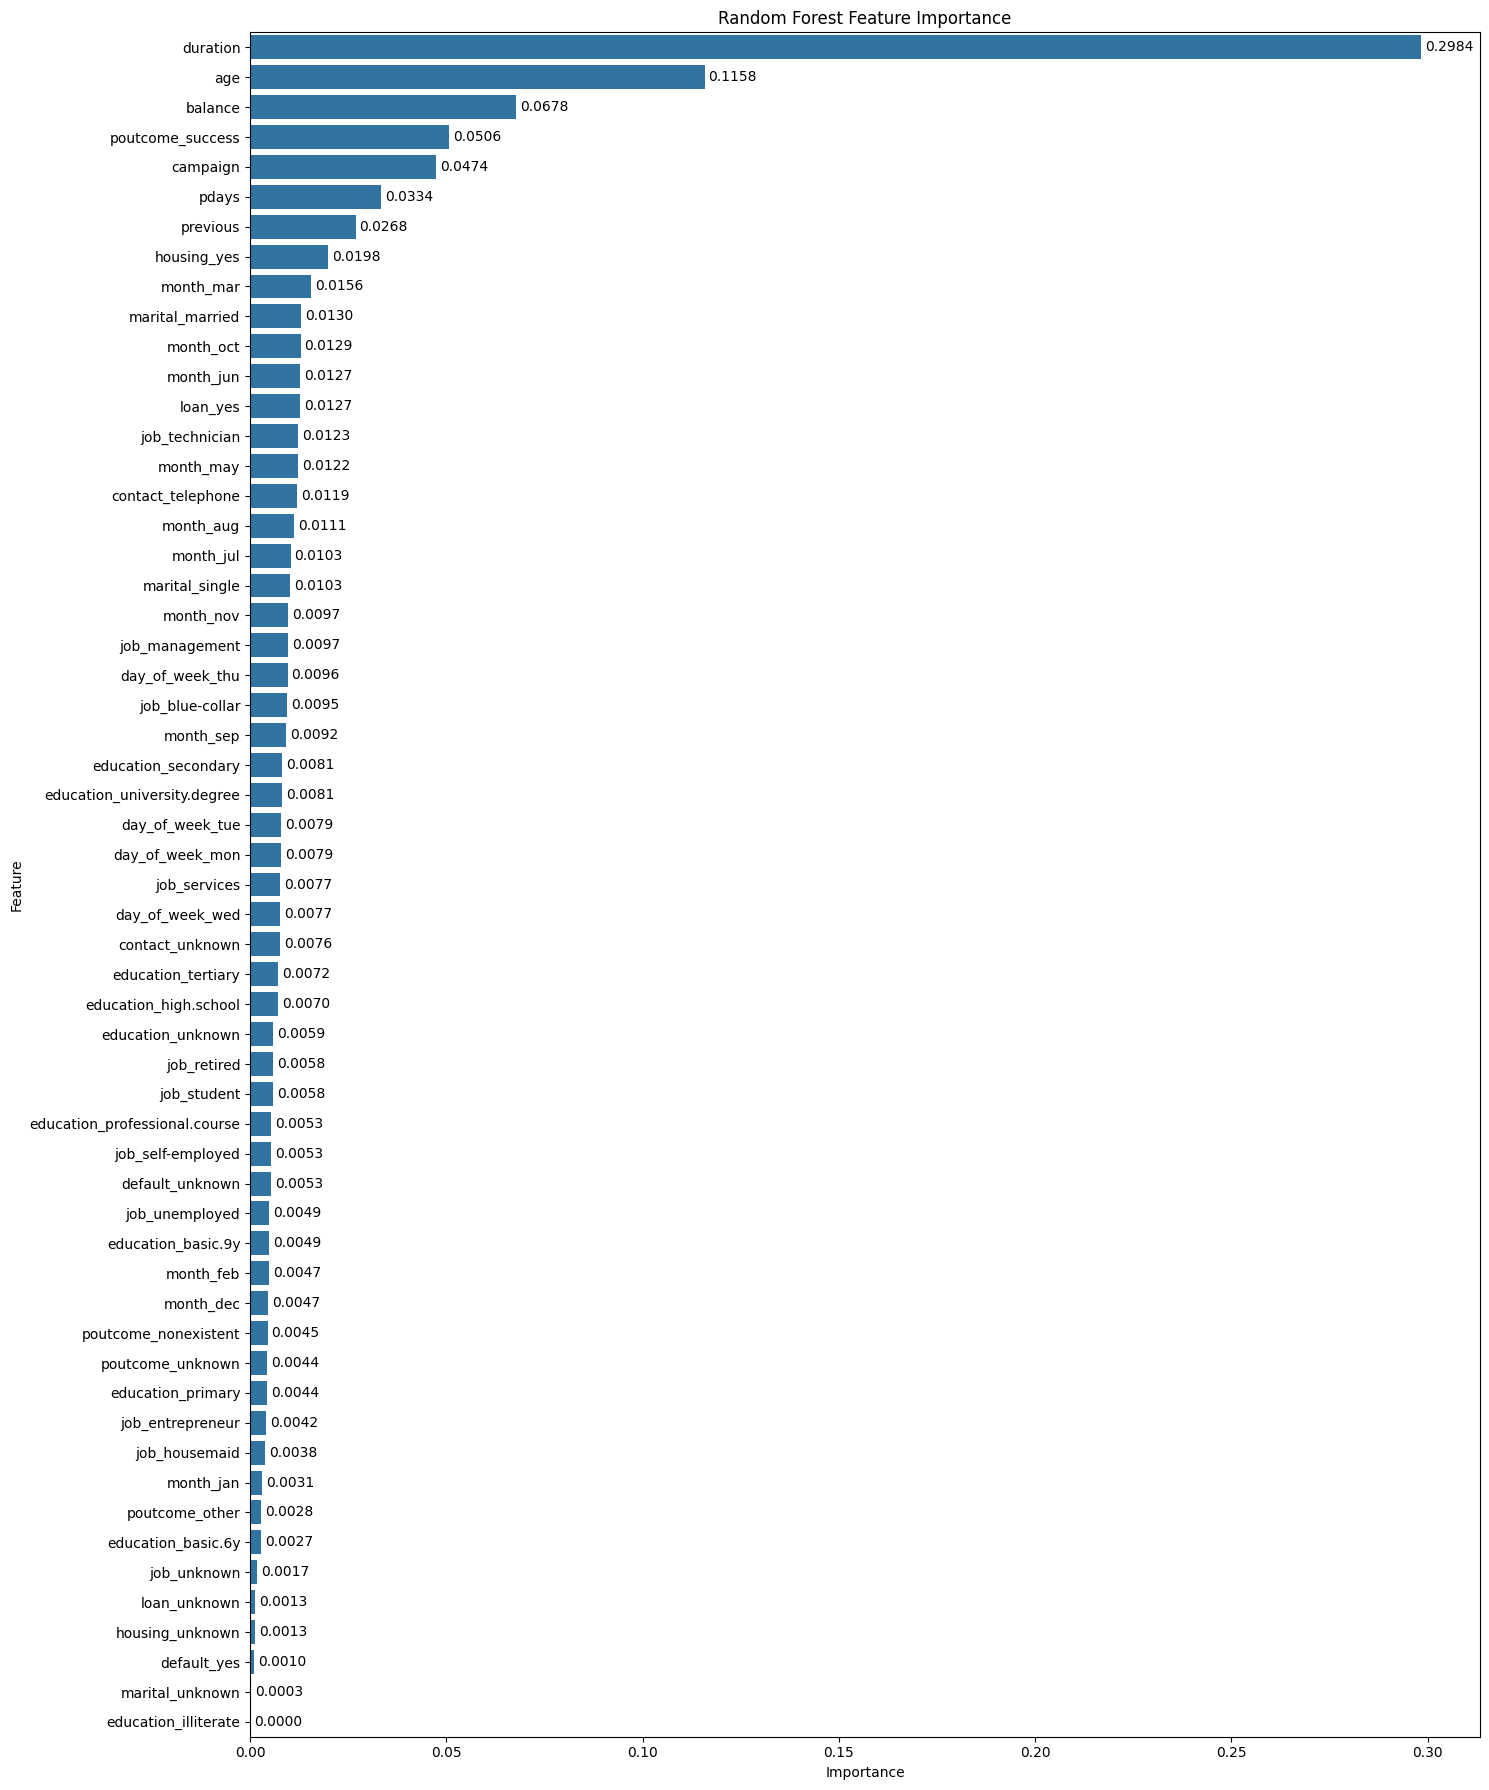

In [ ]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create DataFrame
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)


# Plot
plt.figure(figsize=(15,18))
ax=sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Random Forest Feature Importance')
# Add value labels above (to the right of) each bar
for p in ax.patches:
    width = p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.text(
        width + 0.001,      # small offset to the right
        y,
        f'{width:.4f}',     # format the number
        va='center'
    )
# Increase gap between labels and bars
plt.tight_layout()
plt.show()

###classification accuracy and matrix after ploting model

In [ ]:
# Predict on test data
y_test_pred_rf = rf_model.predict(X_test)

# Convert 0/1 to "no"/"yes" if needed
y_test_pred_labels_rf = ['yes' if x==1 else 'no' for x in y_test_pred_rf]
y_test_labels = ['yes' if x==1 else 'no' for x in y_test]  # same as before

# Print metrics
print("=== Random Forest ===")
print("Test Accuracy:", accuracy_score(y_test_labels, y_test_pred_labels_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_labels, y_test_pred_labels_rf))
print("\nClassification Report:\n", classification_report(y_test_labels, y_test_pred_labels_rf))


=== Random Forest ===
Test Accuracy: 0.9089593702974882

Confusion Matrix:
 [[14914   378]
 [ 1195   791]]

Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.98      0.95     15292
         yes       0.68      0.40      0.50      1986

    accuracy                           0.91     17278
   macro avg       0.80      0.69      0.73     17278
weighted avg       0.90      0.91      0.90     17278



#SVM support vector machine

In [ ]:
# Create SVM model
svm_model = SVC(kernel='rbf',## handles non-linear relationships
                C=1.0, ## soft margin
                gamma='scale',
                random_state=42)  # RBF kernel

# Fit the model
svm_model.fit(X_train, y_train)


SVC(random_state=42)

In [ ]:
# Predict
y_pred_svm = svm_model.predict(X_test)


###classification accuracy and matrix after ploting model

In [ ]:
y_pred_labels = ['yes' if x==1 else 'no' for x in y_pred_svm]
y_test_labels = ['yes' if x==1 else 'no' for x in y_test]
# Accuracy
print("SVM Test Accuracy:", accuracy_score(y_test, y_pred_svm))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


### choosing the best kernal for the data by hyperparameter training and cv- cross validation

In [ ]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],    # test different kernels
    'C': [0.1, 1, 10, 100],                 # regularization
    'gamma': ['scale', 'auto'],             # kernel coefficient
    'degree': [2, 3, 4]                     # only for poly kernel
}

#GridSearchCV for best parameters / hyperparameter is a parameter set before training
grid = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    scoring='accuracy',      # optimize for accuracy
    cv=5,                    # 5-fold cross-validation
    verbose=1
)

grid.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_(X_train, y_train))
print("Best Cross-Validation Accuracy:", grid.best_score_)